# **Notebook PC1_Ativ4 (Part B)**
# MLP classifier for the MNIST database.
## Grid search for the hyperparameters. Code produced by previous students of IA353. Thank you for making Activity 4 still more complete.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Arthur Felipe dos Santos Fernandes


In [1]:
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.cifar10

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 3072)
x_test = x_test.reshape(x_test.shape[0], 3072)

x_train, x_test = x_train / 255.0, x_test / 255.0

In [2]:
def model_and_evaluate(N_NEURONS=512,N_LAYERS=1,DROPOUT=0.3,EPOCHS=5,
                       OPTIMIZER='adam',verbose=1):
    model = tf.keras.models.Sequential([
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(N_NEURONS,activation=tf.nn.relu),
          tf.keras.layers.Dropout(DROPOUT)])
    if N_LAYERS>1:
        for i in range(N_LAYERS-1):
            model.add(tf.keras.layers.Dense(N_NEURONS,activation=tf.nn.relu))
            model.add(tf.keras.layers.Dropout(DROPOUT))
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    model.compile(optimizer=OPTIMIZER,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    model_history = model.fit(x_train, y_train, epochs=EPOCHS,verbose=verbose)
    results = model.evaluate(x_test, y_test,verbose=verbose)
    if verbose:
        model.summary()
        # Evaluate the model on the test data using `evaluate`
        print("Evaluate on test data")
        print("test loss, test acc:", results)
    d = dict(n_neurons = N_NEURONS,
           n_layers  = N_LAYERS,
           optimizer = OPTIMIZER,
           dropout   = DROPOUT,
           epochs    = EPOCHS,
           loss      = results[0],
           accuracy  = results[1])
    return d

In [3]:
rows = []
for rep in range(10):
    row = model_and_evaluate(verbose=0)
    row['rep'] = rep
    rows.append(row)
    for n_neurons in [256,1024,2048,4096]:
        row = model_and_evaluate(N_NEURONS=n_neurons,verbose=0)
        row['rep'] = rep
        rows.append(row)
    for n_layers in [2,3,4]:
        row = model_and_evaluate(N_LAYERS=n_layers,verbose=0)
        row['rep'] = rep
        rows.append(row)  
    for dropout in [0,0.1,0.2,0.4,0.5]:
        row = model_and_evaluate(DROPOUT=dropout,verbose=0)
        row['rep'] = rep
        rows.append(row) 
    for optimizer in ['RMSprop','SGD','Ftrl']:
        row = model_and_evaluate(OPTIMIZER=optimizer,verbose=0)
        row['rep'] = rep
        rows.append(row)
    for epoch in [10,20,30]:
        row = model_and_evaluate(EPOCHS=epoch,verbose=0)
        row['rep'] = rep
        rows.append(row)
df = pd.DataFrame(rows)
df.to_csv('mnist_ativ4_MLP_analysis.csv',index=False)
df.head()

,n_neurons,n_layers,optimizer,dropout,epochs,loss,accuracy,rep
0,512,1,adam,0.3,5,1.697062,0.3904,0
1,256,1,adam,0.3,5,1.816443,0.3351,0
2,1024,1,adam,0.3,5,1.685626,0.3967,0
3,2048,1,adam,0.3,5,1.626351,0.4176,0
4,4096,1,adam,0.3,5,1.643834,0.4117,0


In [4]:
df = pd.read_csv('mnist_ativ4_MLP_analysis.csv')
df.head()

,n_neurons,n_layers,optimizer,dropout,epochs,loss,accuracy,rep
0,512,1,adam,0.3,5,1.697062,0.3904,0
1,256,1,adam,0.3,5,1.816443,0.3351,0
2,1024,1,adam,0.3,5,1.685626,0.3967,0
3,2048,1,adam,0.3,5,1.626351,0.4176,0
4,4096,1,adam,0.3,5,1.643834,0.4117,0


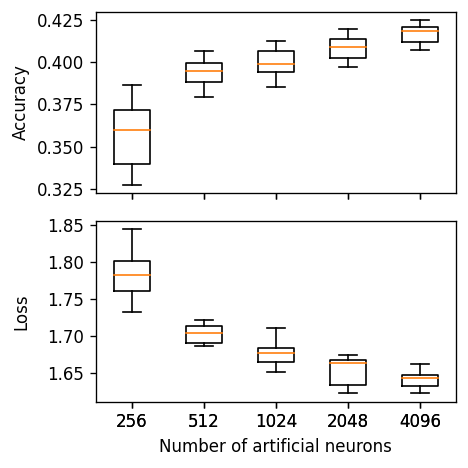

In [5]:
n_neurons = [256,512,1024,2048,4096]
n_layers  = [1,2,3,4]
dropout   = [0,0.1,0.2,0.3,0.4,0.5]
optimizer = ['adam','RMSprop','SGD','Ftrl']
epoch     = [5,10,20,30]

accs = []
losss= []
for i,nn in enumerate(n_neurons):
    c = (df['n_neurons'] == nn) & (df['n_layers'] == n_layers[0]) 
    c = c & (df['dropout'] == dropout[3]) & (df['optimizer'] == optimizer[0]) 
    c = c & (df['epochs'] == epoch[0])
    acc = df[c]['accuracy']
    accs.append(acc)
    loss= df[c]['loss']
    losss.append(loss)

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)
ax[0].boxplot(accs,labels=n_neurons)
ax[0].set_ylabel('Accuracy')
ax[1].boxplot(losss,labels=n_neurons)
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Number of artificial neurons')
fig.align_ylabels()
plt.tight_layout()

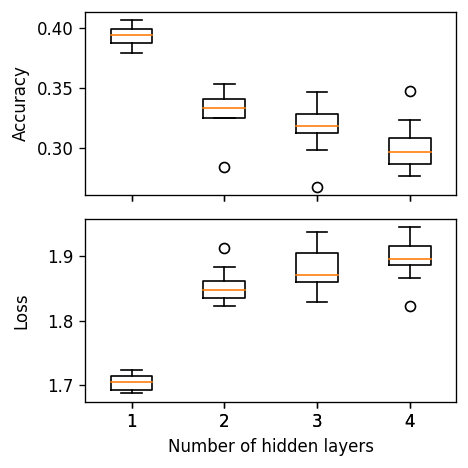

In [6]:
accs = []
losss= []
for i,nl in enumerate(n_layers):
    c = (df['n_neurons'] == 512) & (df['n_layers'] == nl) 
    c = c & (df['dropout'] == dropout[3]) & (df['optimizer'] == optimizer[0]) 
    c = c & (df['epochs'] == epoch[0])
    acc = df[c]['accuracy']
    accs.append(acc)
    loss= df[c]['loss']
    losss.append(loss)

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)
ax[0].boxplot(accs,labels=n_layers)
ax[0].set_ylabel('Accuracy')
ax[1].boxplot(losss,labels=n_layers)
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Number of hidden layers')
fig.align_ylabels()
plt.tight_layout()

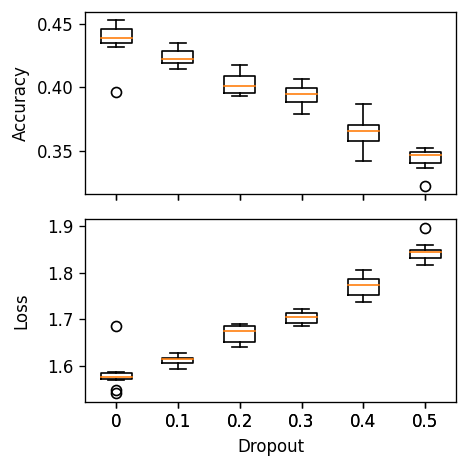

In [7]:
accs = []
losss= []
for i,do in enumerate(dropout):
    c = (df['n_neurons'] == 512) & (df['n_layers'] == 1) 
    c = c & (df['dropout'] == do) & (df['optimizer'] == optimizer[0]) 
    c = c & (df['epochs'] == epoch[0])
    acc = df[c]['accuracy']
    accs.append(acc)
    loss= df[c]['loss']
    losss.append(loss)

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)
ax[0].boxplot(accs,labels=dropout)
ax[0].set_ylabel('Accuracy')
ax[1].boxplot(losss,labels=dropout)
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Dropout')
fig.align_ylabels()
plt.tight_layout()

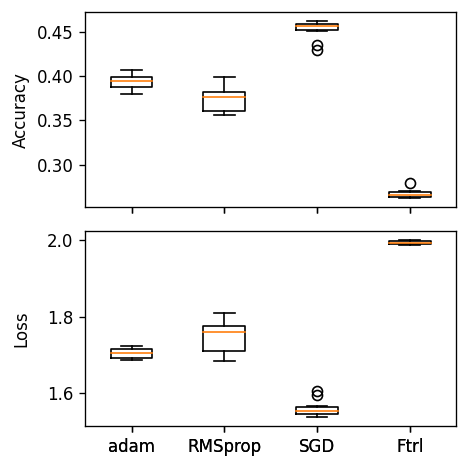

In [8]:
accs = []
losss= []
for i,o in enumerate(optimizer):
    c = (df['n_neurons'] == 512) & (df['n_layers'] == 1) 
    c = c & (df['dropout'] == 0.3) & (df['optimizer'] == o) 
    c = c & (df['epochs'] == epoch[0])
    acc = df[c]['accuracy']
    accs.append(acc)
    loss= df[c]['loss']
    losss.append(loss)

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)
ax[0].boxplot(accs,labels=optimizer)
ax[0].set_ylabel('Accuracy')
ax[1].boxplot(losss,labels=optimizer)
ax[1].set_ylabel('Loss')
fig.align_ylabels()
plt.tight_layout()

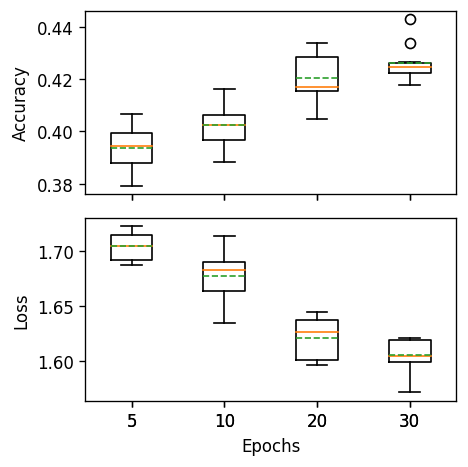

In [9]:
epoch     = [5,10,20,30]
accs = []
losss= []
for i,e in enumerate(epoch):
    c = (df['n_neurons'] == 512) & (df['n_layers'] == 1) 
    c = c & (df['dropout'] == 0.3) & (df['optimizer'] == 'adam') 
    c = c & (df['epochs'] == e)
    acc = df[c]['accuracy']
    accs.append(acc)
    loss= df[c]['loss']
    losss.append(loss)

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)
ax[0].boxplot(accs,labels=epoch,showmeans=True,meanline=True)
ax[0].set_ylabel('Accuracy')
ax[1].boxplot(losss,labels=epoch,showmeans=True,meanline=True)
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
fig.align_ylabels()
plt.tight_layout()

In [10]:
d = model_and_evaluate()

Epoch 1/5
1563/1563 [==============================] - 35s 22ms/step - loss: 1.9938 - accuracy: 0.2704
Epoch 2/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.8794 - accuracy: 0.3121
Epoch 3/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.8457 - accuracy: 0.3264
Epoch 4/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.8182 - accuracy: 0.3405
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 1.7070 - accuracy: 0.4040
Model: "sequential_190"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_190 (Flatten)       (None, 3072)              0         
                                                                 
 dense_440 (Dense)           (None, 512)               1573376   
                                                                 
 dropout_250 (Dropout)       (None, 512)               0         
   